In [1]:
from skimage.io import imread,imsave
from keras.models import Model,load_model
from keras.optimizers import SGD,Adam
from keras.layers import *
from skimage.util import pad,crop
from skimage.transform import resize
import os
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,CSVLogger,Callback,EarlyStopping
import tensorflow as tf
import keras.backend as K
from keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline
K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [24]:
image_folder = r'E:\Dhananjay Study\Theses Mutthu Sir\Shreshth Practice\TGS Salt Identification Task\train\images'
mask_folder = r'E:\Dhananjay Study\Theses Mutthu Sir\Shreshth Practice\TGS Salt Identification Task\train\masks'

X1 = []

for i in os.listdir(image_folder):
    x = imread(os.path.join(image_folder,i)).astype(np.uint8)
    X1.append(x)

    
y1 = []
for i in os.listdir(mask_folder):
    y2 = imread(os.path.join(mask_folder,i)).astype(np.uint8)
    y1.append(y2)

X = np.array((X1))
y = np.array((y1))

y = y / 255.0

print(" ")
print(X.shape, X.dtype)
print(y.shape, y.dtype)
print(" ")
print(np.histogram(y))
#print(np.histogram(y))
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.1,random_state = 1729)
print(" ")
print(x_train.shape)
print(" ")
x_train = np.expand_dims(x_train[...,0], axis = -1)
print(x_train.shape)
x_val = np.expand_dims(x_val[...,0], axis = -1)
print(" ")
print("Y_train shape is:")
print(y_train.shape)
print(" ")
print("Y_train shape is:")
y_train = y_train[...,None]
print(y_train.shape)
y_val = y_val[...,None]
_,img_rows,img_cols,number_of_channels = x_train.shape
print("Image rows is:", img_rows)
print("Image cols is:", img_cols)
print("Number of Channels is:", number_of_channels)
#Why no. of channels are reduced from 3 to 1 and why 1 dimension is added in y form??

 
(4000, 101, 101, 3) uint8
(4000, 101, 101) float64
 
(array([30686001,        0,        0,        0,        0,        0,
              0,        0,        0, 10117999], dtype=int64), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
 
(3600, 101, 101, 3)
 
(3600, 101, 101, 1)
 
Y_train shape is:
(3600, 101, 101)
 
Y_train shape is:
(3600, 101, 101, 1)
Image rows is: 101
Image cols is: 101
Number of Channels is: 1


In [38]:
image_folder = r'E:\Dhananjay Study\Theses Mutthu Sir\Shreshth Practice\TGS Salt Identification Task\train\images'
mask_folder = r'E:\Dhananjay Study\Theses Mutthu Sir\Shreshth Practice\TGS Salt Identification Task\train\masks'
X = np.array([imread(os.path.join(image_folder,img_name)).astype(np.uint8) for img_name in os.listdir(image_folder)])
#y = np.array([imread(os.path.join(mask_folder,img_name)).astype(np.uint8) for img_name in os.listdir(mask_folder)])
X = np.array([resize(imread(os.path.join(image_folder,img_name)).astype(np.uint8),output_shape = (112,112,3),preserve_range=True,mode='constant') for img_name in os.listdir(image_folder)])
y = np.array([resize(imread(os.path.join(mask_folder,img_name)).astype(np.uint8),output_shape = (112,112),order = 0,preserve_range=True,mode='constant') for img_name in os.listdir(mask_folder)])
y = y/255.0
print(y.shape,y.dtype)
print(" ")
print(" ")
print(X.shape,X.dtype)
print(" ")
print(" ")
print(np.histogram(y))
print(" ")
print(" ")

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.1,random_state = 1729)
x_train = np.expand_dims(x_train[...,0],axis = -1)
x_val = np.expand_dims(x_val[...,0],axis = -1)
y_train = y_train[...,None]
y_val = y_val[...,None]
_,img_rows,img_cols,num_channels = x_train.shape

C:\Users\DHANANJAY\Anaconda3\envs\cs231n\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(4000, 112, 112) float64
 
 
(4000, 112, 112, 3) float64
 
 
(array([37733799,        0,        0,        0,        0,        0,
              0,        0,        0, 12442201], dtype=int64), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
 
 


In [ ]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2
    
    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]
    
    area_true = np.histogram(labels, bins = true_objects)[0]
    

In [ ]:
# src: https://www.kaggle.com/aglotero/another-iou-metric

def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in

    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union
    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

        # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)

    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [32]:
class OutputObserver(Callback):

    def __init__(self,x_val,v_labels):
        self.x_val=x_val
        self.v_labels = v_labels

    def on_epoch_end(self,epoch,logs={}):

        if epoch%3 == 0:
            predictions =  self.model.predict(self.x_val,batch_size=1,verbose=True)
            print(np.histogram(predictions))
            fig = plt.figure(figsize = (10,40))
            plt.gray()
            plt.title('Epoch-'+str(epoch))
            rndperm = np.random.RandomState(seed=1618).permutation(predictions.shape[0])
            print(self.x_val.shape)
            print(self.v_labels.shape)
            print(predictions.shape)
            for i in range(0,100,5):
                ax = fig.add_subplot(20,5,i+1)
                image = self.x_val[rndperm[i],...,0].astype(np.uint8)
                ax.imshow(image)
                mask = (self.v_labels)[rndperm[i],...,0]
                ax = fig.add_subplot(20,5,i+2)
                ax.imshow(mask)
                predict1 = (predictions[rndperm[i],...,0]>0.5).astype(np.float64)
                ax = fig.add_subplot(20,5,i+3)
                ax.imshow(predict1)
                predict2 = (predictions[rndperm[i],...,0]>0.75).astype(np.float64)
                ax = fig.add_subplot(20,5,i+4)
                ax.imshow(predict2)
                predict3 = (predictions[rndperm[i],...,0]>0.9).astype(np.float64)
                ax = fig.add_subplot(20,5,i+5)
                ax.imshow(predict3)
            plt.show()
            thres = np.linspace(0.25, 0.75, 20)
            thres_ioc = [iou_metric_batch(self.v_labels, np.int32(predictions > t)) for t in thres]
            plt.plot(thres, thres_ioc)
            plt.show()
            best_thres = thres[np.argmax(thres_ioc)]
            print('best threshold:',best_thres,'max threshold value:' ,max(thres_ioc))

In [40]:
print("Simple Shallow texture encoder followed by a pixelwise Classifier")

inputs = Input((img_rows, img_cols, num_channels))
#Block 1
x = Conv2D(64, (3,3) , activation = 'relu', padding = 'same', name = 'block1_conv1')(inputs)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv2')(x)

x = MaxPooling2D((2, 2), strides = (2, 2), name = 'block1_pool')(x)

#Block 2

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)

x = MaxPooling2D((2, 2), strides = (2, 2), name = 'block2_pool')(x)

#Block 3

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)

x = MaxPooling2D((2, 2), strides = (2, 2), name = 'block3_pool')(x)

t_encoder = Model(inputs = inputs, outputs = x)

x1 = concatenate([t_encoder.get_layer('block1_conv1').output, t_encoder.get_layer('block1_conv2').output])
x1 = Conv2D(64, (1, 1), activation = 'relu')(x1)
x2 = concatenate([t_encoder.get_layer('block2_conv1').output, t_encoder.get_layer('block2_conv2').output])
x2 = Conv2D(128, (1, 1), activation = 'relu')(x2)
x2 = UpSampling2D((2,2))(x2)
x3 = concatenate([t_encoder.get_layer('block3_conv1').output, t_encoder.get_layer('block3_conv2').output, t_encoder.get_layer('block3_conv3').output])
x3 = Conv2D(256, (1, 1), activation = 'relu')(x3)
x3 = UpSampling2D((4,4))(x3)

x = concatenate([x1, x2, x3])
x = Conv2D(256, (3,3), activation = 'relu')(x)
x = Conv2D(32, (3,3), activation = 'relu')(x)
x = Conv2D(1, (3,3), activation = 'sigmoid')(x)

model = Model(inputs = inputs, outputs = x)
model.summary()

Simple Shallow texture encoder followed by a pixelwise Classifier
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 112, 112, 64) 640         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 112, 112, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 56, 56, 64)   0           block1_conv2[0][0]               
___________________________________________

In [44]:
#simple Unet Function with Encoders and Decoders
inputs = Input((img_rows, img_cols, num_channels))

#Block 1
s = Lambda(lambda x : x / 255)(inputs)
c1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv1')(s)
c1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv2')(c1)
p1 = MaxPooling2D((2,2), strides = (2,2), name = 'block1_pool')(c1)

#Block 2

c2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(p1)
c2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(c2)
p2 = MaxPooling2D((2,2), strides = (2,2), name = 'block2_pool')(c2)

#Block 3

c3 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(p2)
c3 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(c3)
p3 = MaxPooling2D((2,2), strides = (2,2), name = 'block3_pool')(c3)

#Block 4

c4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv1')(p3)
c4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv2')(c4)
p4 = MaxPooling2D((2,2), strides = (2,2), name = 'block4_pool')(c4)

#Block 5

c5 = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv1')(p4)
c5 = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv2')(c5)

u6 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = 'same')(c5)
u6 = concatenate([u6,c4])
c6 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(u6)
c6 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(c6)

u7 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = 'same')(c6)
u7 = concatenate([u7,c3])
c7 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(u7)
c7 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(c7)

u8 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = 'same')(c7)
u8 = concatenate([u8,c2])
c8 = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(u8)
c8 = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(c8)

u9 = Conv2DTranspose(8, (2,2), strides = (2,2), padding = 'same')(c8)
u9 = concatenate([u9,c1])
c9 = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(u9)
c9 = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(u9)

outputs = Conv2D(1, (1,1), activation = 'relu', padding = 'same')(c9)

model = Model(inputs = [inputs], outputs = [outputs])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 112, 112, 1)  0           input_16[0][0]                   
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 112, 112, 64) 640         lambda_4[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 112, 112, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_poo

In [36]:
'''
#simple shallow texture encoder followed by a pixelwise classifier
inputs = Input((img_rows,img_cols,num_channels))
# Block 1
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv')(inputs)
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
# Block 2
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1')(x)
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
#Block 3
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)
#x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

t_encoder = Model(inputs = inputs, outputs = x)

x1 = concatenate([t_encoder.get_layer(name = 'block1_conv' ).output,t_encoder.get_layer(name = 'block1_conv2' ).output])
x1 = Conv2D(64,(1,1),activation = 'relu')(x1)
x2 = concatenate([t_encoder.get_layer(name = 'block2_conv1' ).output,t_encoder.get_layer(name = 'block2_conv2' ).output])
x2 = Conv2D(128,(1,1), activation = 'relu')(x2)
x2 = UpSampling2D((2,2))(x2)
x3 = concatenate([t_encoder.get_layer(name = 'block3_conv1' ).output,t_encoder.get_layer(name = 'block3_conv2' ).output,t_encoder.get_layer(name = 'block3_conv3' ).output])
x3 = Conv2D(256,(1,1), activation = 'relu')(x3)
x3 = UpSampling2D((4,4))(x3)

x = concatenate([x1,x2,x3])
x = Conv2D(256,(1,1),activation = 'relu')(x)
x = Conv2D(32,(1,1),activation = 'relu')(x)
x = Conv2D(1,(1,1),activation = 'sigmoid')(x)

model = Model(inputs = inputs, outputs = x)
'''

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 101, 101, 64), (None, 100, 100, 128), (None, 100, 100, 256)]

In [29]:
'''
# plain ultrasound challenge u-net
inputs = Input((img_rows,img_cols,num_channels))
s = Lambda(lambda x: x / 255) (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
'''

"\n# plain ultrasound challenge u-net\ninputs = Input((img_rows,img_cols,num_channels))\ns = Lambda(lambda x: x / 255) (inputs)\nc1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)\nc1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)\np1 = MaxPooling2D((2, 2)) (c1)\n\nc2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)\nc2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)\np2 = MaxPooling2D((2, 2)) (c2)\n\nc3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)\nc3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)\np3 = MaxPooling2D((2, 2)) (c3)\n\nc4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)\nc4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)\np4 = MaxPooling2D(pool_size=(2, 2)) (c4)\n\nc5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)\nc5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)\n\nu6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)\nu6 

In [47]:
print("Unet with Spatial Dropout")

inputs = Input((img_rows, img_cols, num_channels))

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(inputs)
x_skip_1 = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip_1)

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x_skip_2 = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip_2)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x_skip_3 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip_3)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x_skip_4 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip_4)

x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip_4)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip_3)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 64, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip_2)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 64, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip_1)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2D(1,(1,1),activation = 'sigmoid',name = 'final_out')(x)


model = Model(inputs = inputs, outputs = [x])

model.summary()

Unet with Spatial Dropout
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 112, 112, 64) 640         input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 112, 112, 64) 36928       conv2d_75[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_76[0][0]                  
___________________________________________________________________________________

In [33]:
'''
#unet with spatial dropout - mean_iou - 73.8 at threshold of 0.7 - model 4
inputs = Input((img_rows,img_cols,num_channels))

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(inputs)
x_skip_1 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_1)

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_2 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_2)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_3 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_3)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_4 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_4)

x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)

x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_4)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)

x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_3)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)

x = Conv2DTranspose(filters = 64,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_2)])
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)

x = Conv2DTranspose(filters = 32,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_1)])
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)

x = Conv2D(1,(1,1),activation = 'sigmoid',name = 'final_out')(x)


model = Model(inputs = inputs, outputs = [x])
'''

In [53]:
inputs = Input((img_rows, img_cols, num_channels))

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(inputs)
x = BatchNormalization()(x)
x_skip1 = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip1)

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip2 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip2)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip3 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip3)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip4 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip4)

x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip4)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip3)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 64, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip2)])
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 64, kernel_size = (2,2), strides = 2)(x)
x = concatenate([x,SpatialDropout2D(0.5)(x_skip1)])
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2D(1, (1,1), activation = 'sigmoid', name = 'final_out')(x)

model = Model(inputs = inputs, outputs = [x])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
conv2d_167 (Conv2D)             (None, 112, 112, 64) 640         input_25[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 112, 112, 64) 256         conv2d_167[0][0]                 
__________________________________________________________________________________________________
conv2d_168 (Conv2D)             (None, 112, 112, 64) 36928       batch_normalization_67[0][0]     
__________________________________________________________________________________________________
max_poolin

In [38]:
#unet with spatial dropout - mean_iou - 73.8 at threshold of 0.7 - model 4
'''
inputs = Input((img_rows,img_cols,num_channels))

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(inputs)
x = BatchNormalization()(x)
x_skip_1 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_1)

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip_2 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_2)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip_3 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_3)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x_skip_4 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_4)

x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_4)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_3)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 64,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_2)])
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(filters = 32,kernel_size = (2,2),strides = 2)(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_1)])
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = BatchNormalization()(x)


x = Conv2D(1,(1,1),activation = 'sigmoid',name = 'final_out')(x)

model = Model(inputs = inputs, outputs = [x])
'''

In [ ]:
print("Deeper encoder followed by a decoder")

inputs = Inputs((img_rows,img_cols,num_channels))

x = Concatenate()([inputs,inputs,inputs])

#Block 1

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv1', trainable = True)(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv2', trainable = True)(x)
x = MaxPooling2D((2,2), strides = (2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1', trainable = True)(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2', trainable = True)(x)
x = MaxPooling2D((2,2), strides = (2,2))(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1', trainable = True)(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2', trainable = True)(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3', trainable = True)(x)

t_encoder = Model(inputs = inputs, outputs = x)

x1 = concatenate([t_encoder.get_layer('block1_conv1').output, t_encoder.get_layer('block1_conv2').output()])
x1 = SpatialDropout2D(0.1)(x1)
x1 = Conv2D(64, (1,1), padding = 'same', activation = 'elu')(x1)
x2 = concatenate([t_encoder.get_layer('block2_conv1').output, t_encoder.get_layer('block2_conv2').output()])
x2 = SpatialDropout2D(0.2)(x2)
x2 = Conv2D(128, (1,1), padding = 'same', activation = 'elu')(x2)
x2 = UpSampling2D((2,2))(x2)
x3 = concatenate([t_encoder.get_layer('block3_conv1').output(), t_encoder.get_layer('block3_conv2').output(), t_encoder.get_layer('block3_conv3')])
x3 = SpatialDropout2D(0.3)(x2)
x3 = Conv2D(256, (1,1), padding = 'same', activation = 'elu')(x3)
x3 = UpSampling2D((4,4))(x3)

x_concat = Concatenate()([x1,x2,x3])

x_aux = Conv2D(256,(1,1),activation = 'elu')(x_concat)
x_aux = Conv2D(32,(1,1),activation = 'elu')(x_aux)
x_aux = Conv2D(1,(1,1),activation = 'sigmoid',name = 'aux_out')(x_aux)

x_concat = SpatialDropout2D(0.5)(x_concat)
x = Concatenate()([x_concat,inputs])
x = Conv2D(128,(1,1),activation = 'elu')(x)

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x_skip1 = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip1)

x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x)
x_skip2 = Conv2D(64, (3,3), padding = 'same', activation = 'elu')(x_skip2)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip2)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x_skip3 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip3)

x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x_skip4 = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = MaxPooling2D((2,2), strides = (2,2))(x_skip4)

x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip4)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 128, kernel_size = (2,2), strides = 2)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(x_skip3)])
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'elu')(x)

x = Conv2DTranspose(filters = 64, kernel_size = (2,2), strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x, SpatialDropout2D(x_skip2)])
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')
x = Conv2D(64, (3,3), padding = 'same', activation = 'elu')

x = Conv2DTranspose(filters = 32, kernel_size = (2,2), strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout(0.5)(x_skip1)])
x = Conv2D(32, (3,3), padding = 'same', activation = 'elu')(x)
x = Conv2D(32, (3,3), padding = 'same', activation = 'elu')(x)

x = Concatenate()([xt,Conv2D(32,(1,1),activation = 'elu')(x_concat)])
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Add()([x,xt])


x = Conv2D(1,(1,1),activation = 'sigmoid',name = 'final_out')(x)


model = Model(inputs = inputs, outputs = [x])
model.summary()

In [ ]:
#a deeper texture encoder followed by a decoder (U-net like)
'''
inputs = Input((img_rows,img_cols,num_channels))
# Block 1
x = Concatenate()([inputs,inputs,inputs])
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1',trainable = True)(x)
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2',trainable = True)(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
# Block 2
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1',trainable = True)(x)
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2',trainable = True)(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
#Block 3
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1',trainable = True)(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2',trainable = True)(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3',trainable = True)(x)

t_encoder = Model(inputs = inputs, outputs = x)
'''

In [31]:
'''
x1 = Concatenate()([t_encoder.get_layer(name = 'block1_conv1').output,t_encoder.get_layer(name = 'block1_conv2').output])
x1 = SpatialDropout2D(0.1)(x1)
x1 = Conv2D(64,(1,1),padding = 'same',activation = 'elu')(x1)
x2 = Concatenate()([t_encoder.get_layer(name = 'block2_conv1' ).output,t_encoder.get_layer(name = 'block2_conv2' ).output])
x2 = SpatialDropout2D(0.2)(x2)
x2 = Conv2D(128,(1,1), padding = 'same', activation = 'elu')(x2)
x2 = UpSampling2D((2,2))(x2)
x3 = Concatenate()([t_encoder.get_layer(name = 'block3_conv1' ).output,t_encoder.get_layer(name = 'block3_conv2' ).output,t_encoder.get_layer(name = 'block3_conv3' ).output])
x3 = SpatialDropout2D(0.3)(x3)
x3 = Conv2D(256,(1,1),padding = 'same', activation = 'elu')(x3)
x3 = UpSampling2D((4,4))(x3)

x_concat = Concatenate()([x1,x2,x3])

x_aux = Conv2D(256,(1,1),activation = 'relu')(x_concat)
x_aux = Conv2D(32,(1,1),activation = 'relu')(x_aux)
x_aux = Conv2D(1,(1,1),activation = 'sigmoid',name = 'aux_out')(x_aux)

x_concat = SpatialDropout2D(0.5)(x_concat)
x = Concatenate()([x_concat,inputs])
x = Conv2D(128,(1,1),activation = 'elu')(x)

# U-Net begins here. Hypothesis - the above encoder would learn rich locally optimal textural features
# the focus below will be on increasing theoretical FOV  and to learn interesting global features

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_1 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_1)

x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_2 = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_2)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_3 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_3)

x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x_skip_4 = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x_skip_4)

x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(256,(3,3),padding = 'same',activation = 'elu')(x)

#x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_4)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)

#x = Conv2DTranspose(filters = 128,kernel_size = (2,2),strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_3)])
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(128,(3,3),padding = 'same',activation = 'elu')(x)

#x = Conv2DTranspose(filters = 64,kernel_size = (2,2),strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_2)])
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(64,(3,3),padding = 'same',activation = 'elu')(x)

#x = Conv2DTranspose(filters = 32,kernel_size = (2,2),strides = 2)(x)
x = UpSampling2D((2,2))(x)
x = Concatenate()([x,SpatialDropout2D(0.5)(x_skip_1)])
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)


x = Concatenate()([xt,Conv2D(32,(1,1),activation = 'elu')(x_concat)])
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Conv2D(32,(3,3),padding = 'same',activation = 'elu')(x)
x = Add()([x,xt])


x = Conv2D(1,(1,1),activation = 'sigmoid',name = 'final_out')(x)


model = Model(inputs = inputs, outputs = [x])
'''

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 112, 112, 64) 640         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_192[0][0]                 
__________________________________________________________________________________________________
conv2d_193 (Conv2D)             (None, 112, 112, 64) 36928       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

Train on 3600 samples, validate on 400 samples
Epoch 1/100
3600/3600 [==============================] - 63s 17ms/step - loss: 0.6631 - acc: 0.6559 - val_loss: 0.4323 - val_acc: 0.8579

Epoch 00001: val_loss improved from inf to 0.43225, saving model to model5\model.h5
400/400 [==============================] - 5s 12ms/step
(array([ 590343, 1732987,  858120,  397760,  223493,  145848,  109227,
         97935,  122020,  739867], dtype=int64), array([2.6276440e-04, 9.9977657e-02, 1.9969255e-01, 2.9940742e-01,
       3.9912233e-01, 4.9883720e-01, 5.9855211e-01, 6.9826698e-01,
       7.9798186e-01, 8.9769679e-01, 9.9741167e-01], dtype=float32))
(400, 112, 112, 1)
(400, 112, 112, 1)
(400, 112, 112, 1)


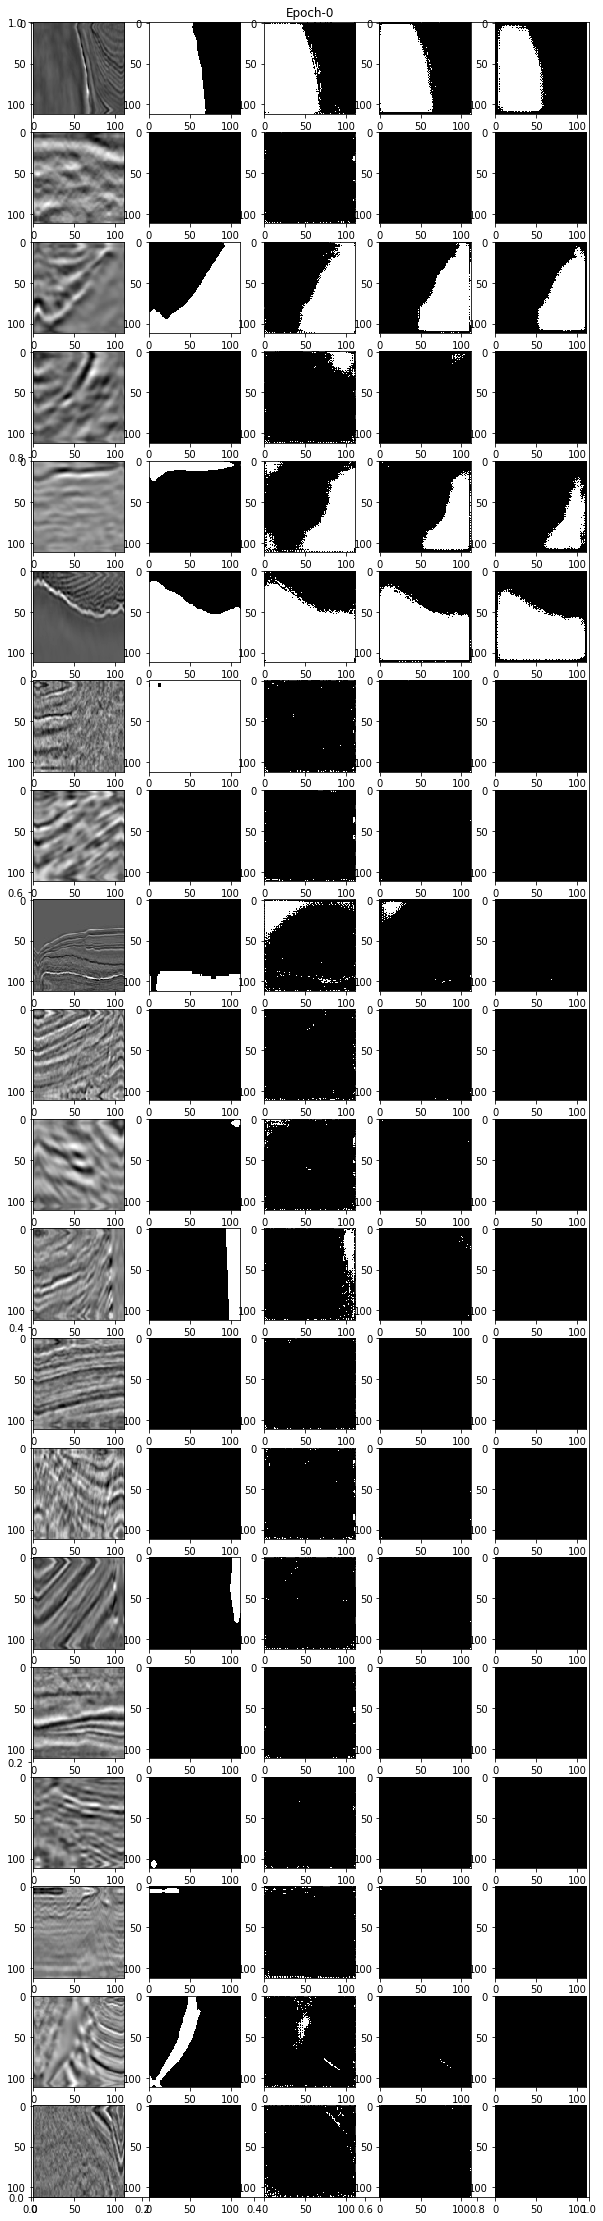

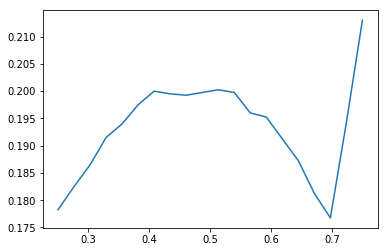

best threshold: 0.75 max threshold value: 0.213
Epoch 2/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.5206 - acc: 0.7792 - val_loss: 0.3428 - val_acc: 0.8925

Epoch 00002: val_loss improved from 0.43225 to 0.34283, saving model to model5\model.h5
Epoch 3/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.4560 - acc: 0.8315 - val_loss: 0.3655 - val_acc: 0.8971

Epoch 00003: val_loss did not improve from 0.34283
Epoch 4/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.4245 - acc: 0.8517 - val_loss: 0.3115 - val_acc: 0.9090

Epoch 00004: val_loss improved from 0.34283 to 0.31152, saving model to model5\model.h5
400/400 [==============================] - 3s 8ms/step
(array([1306970, 1989061,  486920,  188028,   86500,   57374,   49170,
         51278,   67217,  735082], dtype=int64), array([0.00111093, 0.10099982, 0.20088872, 0.3007776 , 0.4006665 ,
       0.5005554 , 0.6004443 , 0.7003332 , 0.8002221 , 0.90011096,
  

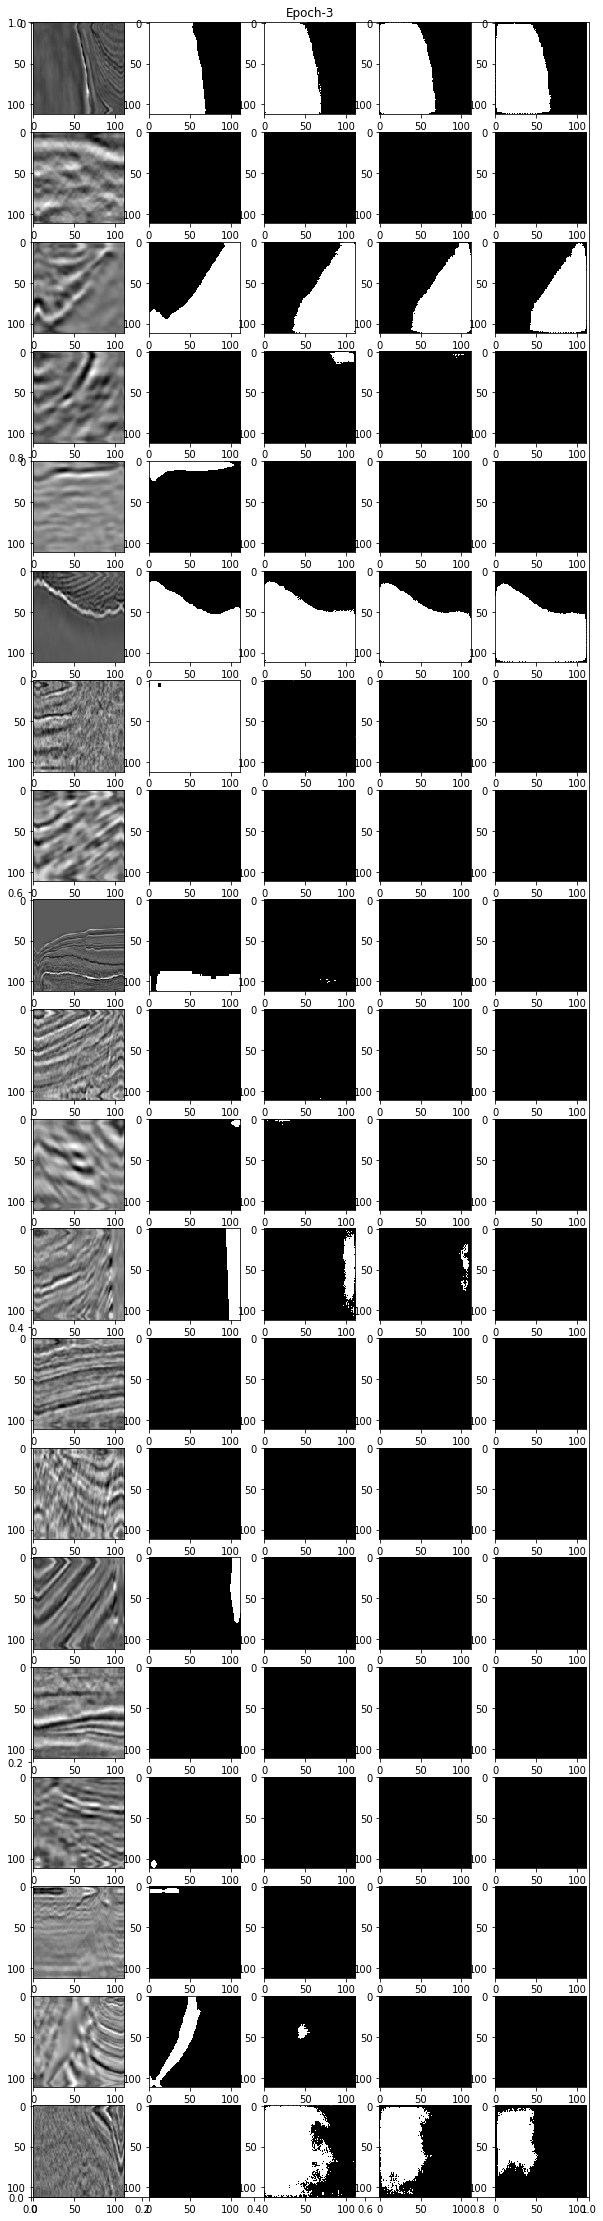

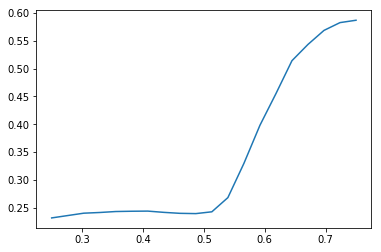

best threshold: 0.75 max threshold value: 0.5870000000000001
Epoch 5/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.3760 - acc: 0.8761 - val_loss: 0.2755 - val_acc: 0.9033

Epoch 00005: val_loss improved from 0.31152 to 0.27552, saving model to model5\model.h5
Epoch 6/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.3594 - acc: 0.8824 - val_loss: 0.2610 - val_acc: 0.9121

Epoch 00006: val_loss improved from 0.27552 to 0.26101, saving model to model5\model.h5
Epoch 7/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.3366 - acc: 0.8897 - val_loss: 0.2652 - val_acc: 0.9157

Epoch 00007: val_loss did not improve from 0.26101
400/400 [==============================] - 3s 9ms/step
(array([2895579,  837404,  222258,   87676,   52356,   42256,   39102,
         43596,   57807,  739566], dtype=int64), array([0.00118291, 0.10106461, 0.20094633, 0.30082804, 0.40070975,
       0.50059146, 0.60047317, 0.7003549 , 0.8002366 , 0

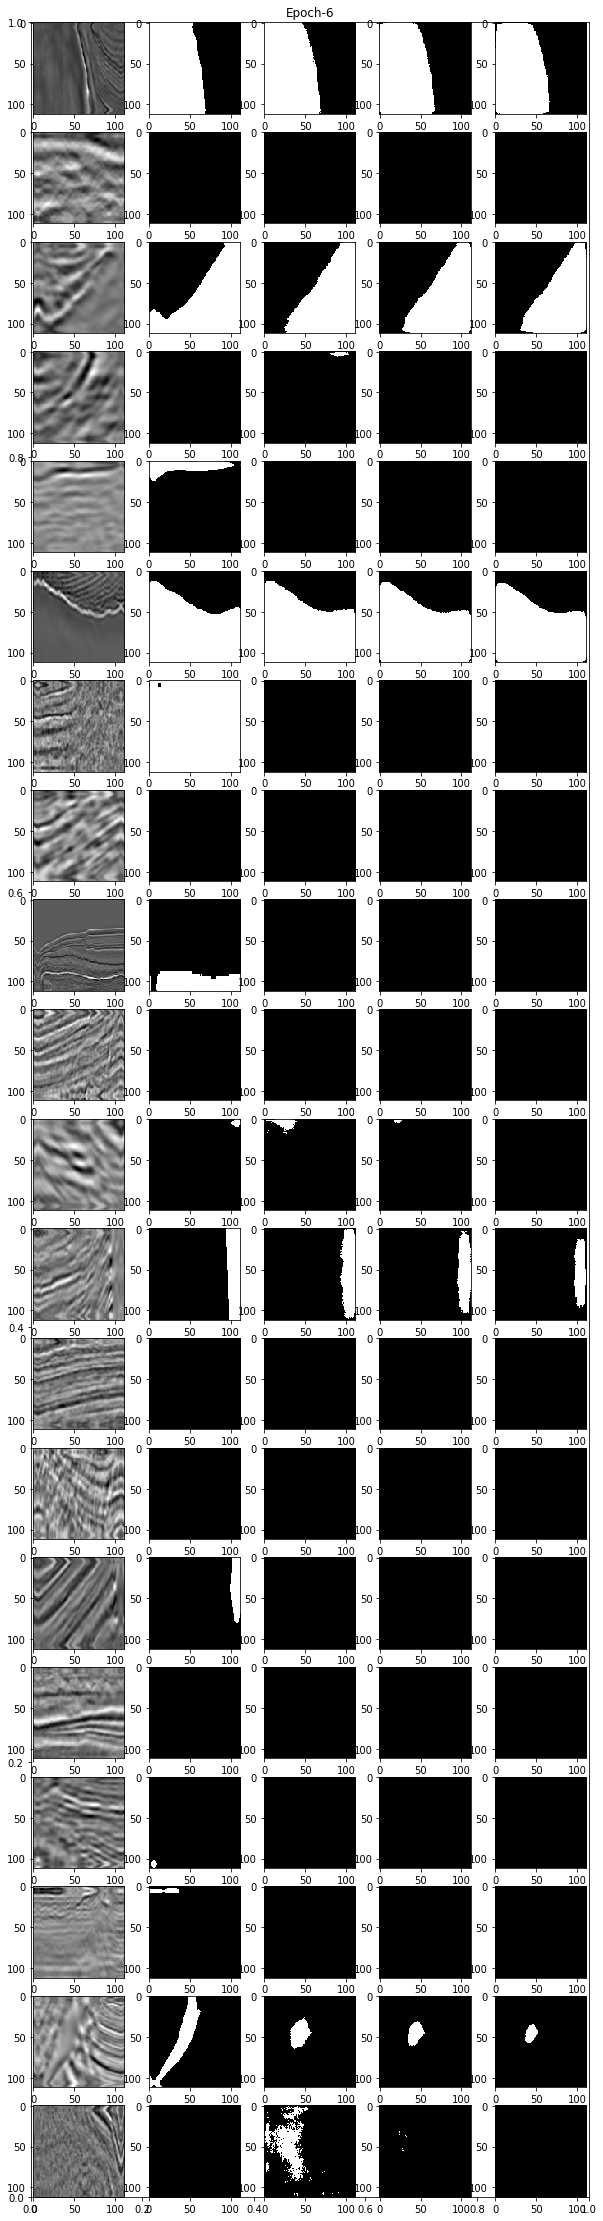

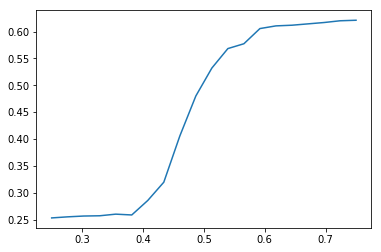

best threshold: 0.75 max threshold value: 0.621
Epoch 8/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.3233 - acc: 0.8956 - val_loss: 0.2652 - val_acc: 0.9139

Epoch 00008: val_loss did not improve from 0.26101
Epoch 9/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.3158 - acc: 0.8987 - val_loss: 0.2805 - val_acc: 0.9082

Epoch 00009: val_loss did not improve from 0.26101

Epoch 00009: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 10/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2971 - acc: 0.9065 - val_loss: 0.2308 - val_acc: 0.9241

Epoch 00010: val_loss improved from 0.26101 to 0.23079, saving model to model5\model.h5
400/400 [==============================] - 3s 9ms/step
(array([3005347,  720493,  199465,   95580,   61538,   47896,   42570,
         43186,   55915,  745610], dtype=int64), array([0.00161401, 0.1014526 , 0.2012912 , 0.30112982, 0.4009684 ,
       0.500807  , 0.600

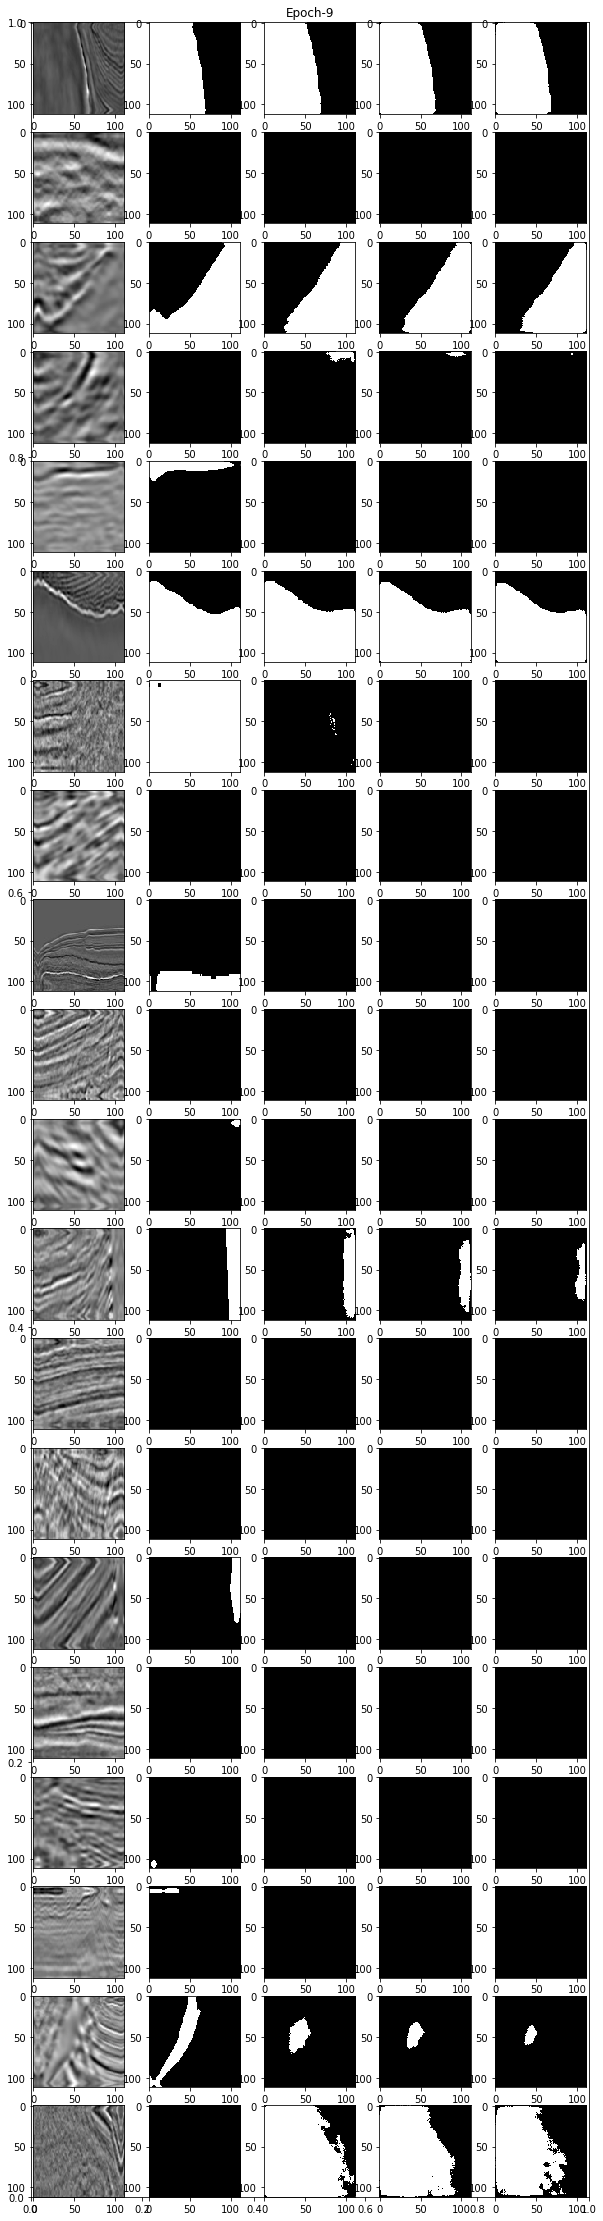

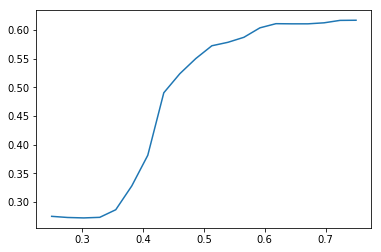

best threshold: 0.75 max threshold value: 0.61675
Epoch 11/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2807 - acc: 0.9115 - val_loss: 0.2290 - val_acc: 0.9248

Epoch 00011: val_loss improved from 0.23079 to 0.22898, saving model to model5\model.h5
Epoch 12/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2708 - acc: 0.9156 - val_loss: 0.2303 - val_acc: 0.9250

Epoch 00012: val_loss did not improve from 0.22898
Epoch 13/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2804 - acc: 0.9100 - val_loss: 0.2294 - val_acc: 0.9263

Epoch 00013: val_loss did not improve from 0.22898
400/400 [==============================] - 3s 8ms/step
(array([2992588,  740200,  214074,   95113,   57458,   43680,   40243,
         43093,   58411,  732740], dtype=int64), array([0.00200602, 0.10180541, 0.20160481, 0.3014042 , 0.4012036 ,
       0.501003  , 0.6008024 , 0.7006018 , 0.8004012 , 0.9002006 ,
       1.        ], dtype=float32)

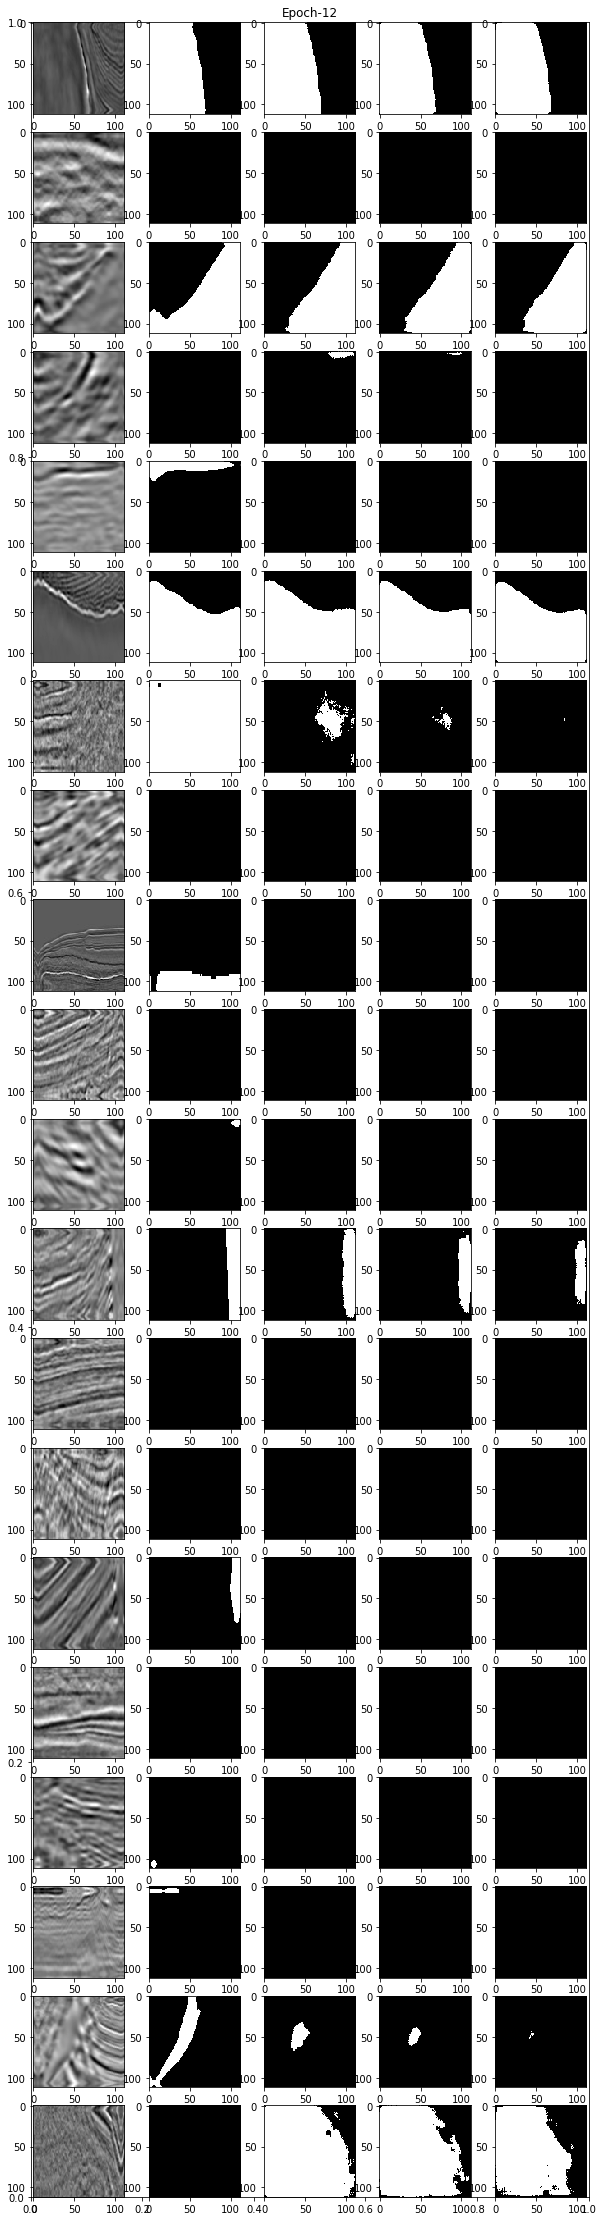

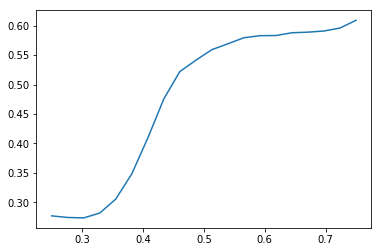

best threshold: 0.75 max threshold value: 0.60925
Epoch 14/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2783 - acc: 0.9135 - val_loss: 0.2328 - val_acc: 0.9257

Epoch 00014: val_loss did not improve from 0.22898

Epoch 00014: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 15/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2689 - acc: 0.9168 - val_loss: 0.2308 - val_acc: 0.9258

Epoch 00015: val_loss did not improve from 0.22898
Epoch 16/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2807 - acc: 0.9116 - val_loss: 0.2274 - val_acc: 0.9262

Epoch 00016: val_loss improved from 0.22898 to 0.22742, saving model to model5\model.h5
400/400 [==============================] - 3s 9ms/step
(array([3185333,  592750,  170053,   83491,   55405,   43263,   39083,
         41076,   54420,  752726], dtype=int64), array([0.00139433, 0.1012549 , 0.20111546, 0.30097604, 0.4008366 ,
       0.50069714, 0.60055774, 0.700

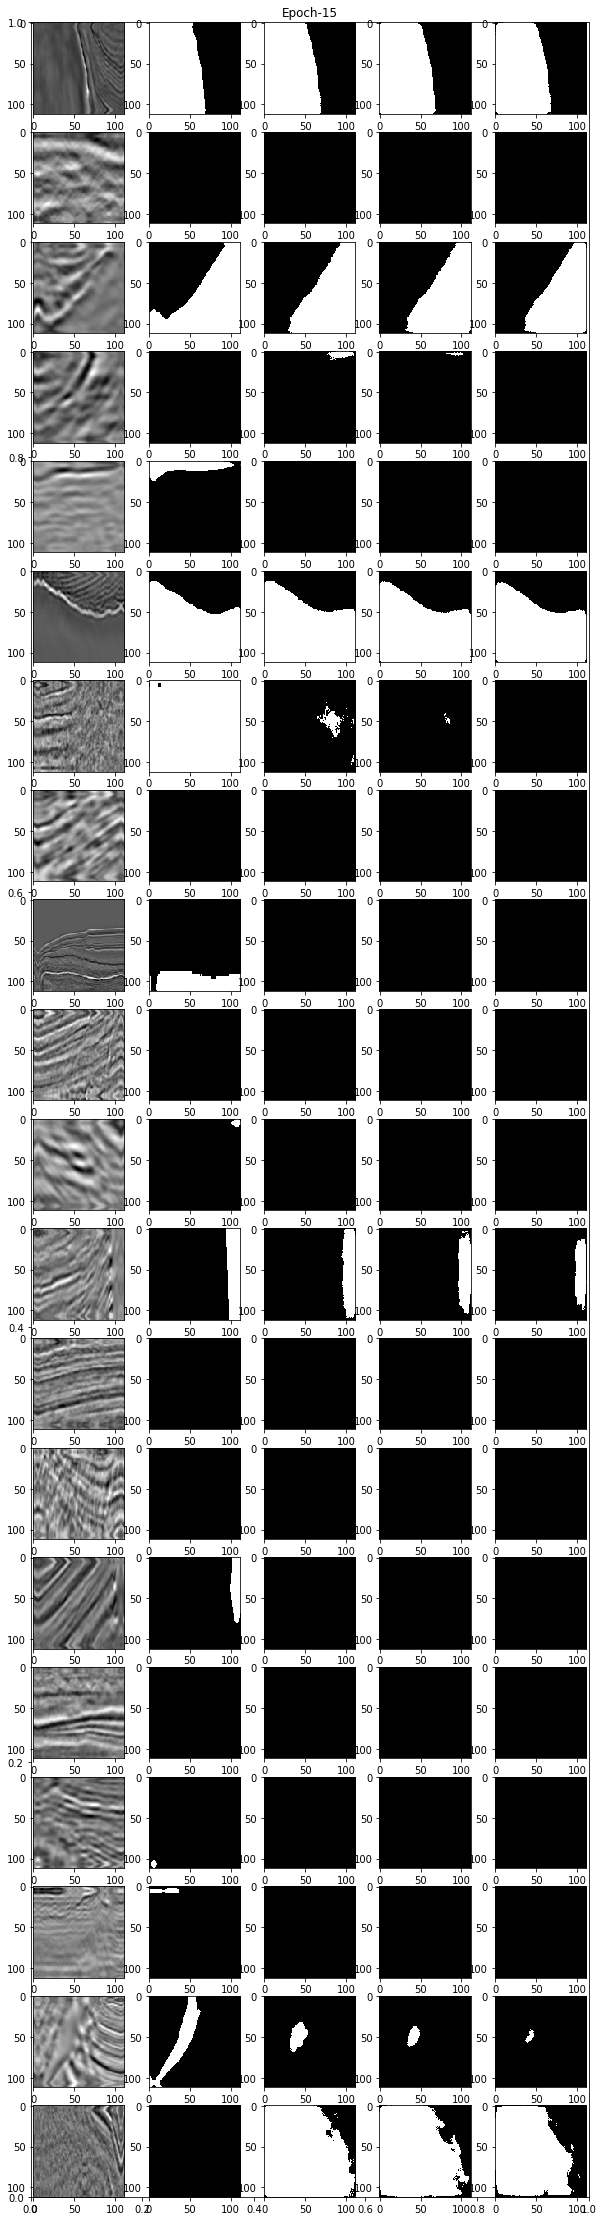

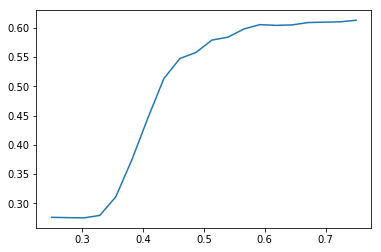

best threshold: 0.75 max threshold value: 0.613
Epoch 17/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2757 - acc: 0.9144 - val_loss: 0.2308 - val_acc: 0.9261

Epoch 00017: val_loss did not improve from 0.22742
Epoch 18/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2677 - acc: 0.9172 - val_loss: 0.2277 - val_acc: 0.9262

Epoch 00018: val_loss did not improve from 0.22742
Epoch 19/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2695 - acc: 0.9158 - val_loss: 0.2297 - val_acc: 0.9260

Epoch 00019: val_loss did not improve from 0.22742

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1e-07.
400/400 [==============================] - 3s 9ms/step
(array([3062979,  653727,  186260,   93275,   61157,   47591,   41183,
         42816,   56823,  771789], dtype=int64), array([0.00150338, 0.10135304, 0.2012027 , 0.30105236, 0.40090203,
       0.5007517 , 0.6006014 , 0.700451  , 0.80030066, 0.90015036,
       1

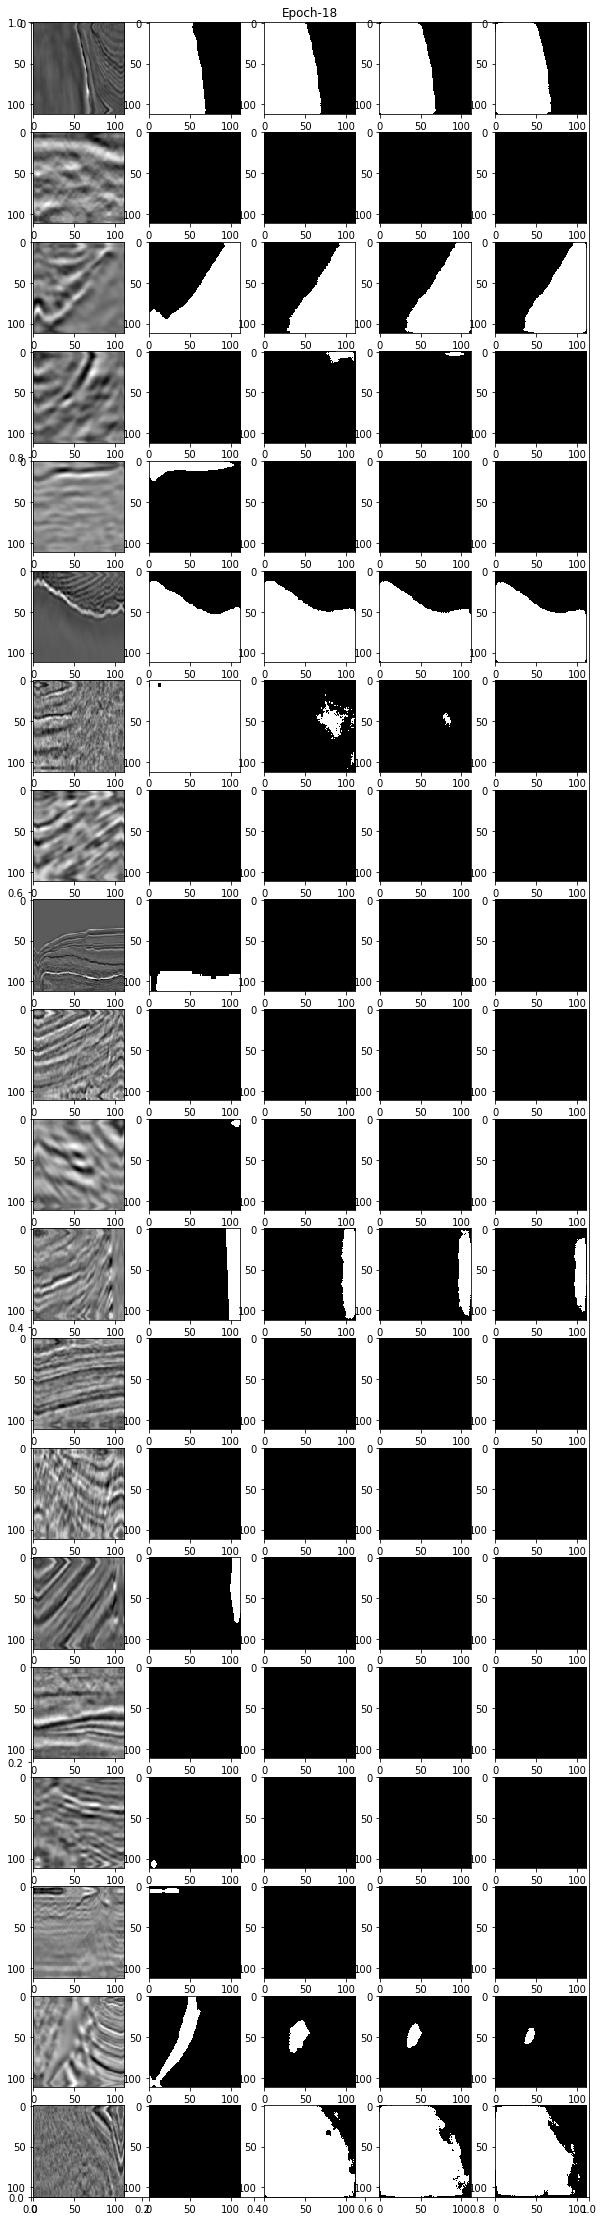

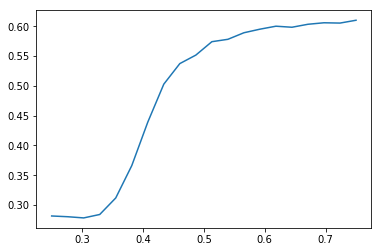

best threshold: 0.75 max threshold value: 0.61
Epoch 20/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2662 - acc: 0.9179 - val_loss: 0.2302 - val_acc: 0.9263

Epoch 00020: val_loss did not improve from 0.22742
Epoch 21/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2676 - acc: 0.9171 - val_loss: 0.2254 - val_acc: 0.9263

Epoch 00021: val_loss improved from 0.22742 to 0.22539, saving model to model5\model.h5
Epoch 22/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2630 - acc: 0.9171 - val_loss: 0.2276 - val_acc: 0.9262

Epoch 00022: val_loss did not improve from 0.22539
400/400 [==============================] - 3s 9ms/step
(array([3081786,  656644,  184984,   91307,   58780,   45511,   39869,
         41927,   54667,  762125], dtype=int64), array([0.00174225, 0.10156802, 0.2013938 , 0.30121958, 0.40104535,
       0.5008711 , 0.6006969 , 0.70052266, 0.80034846, 0.9001742 ,
       1.        ], dtype=float32))
(

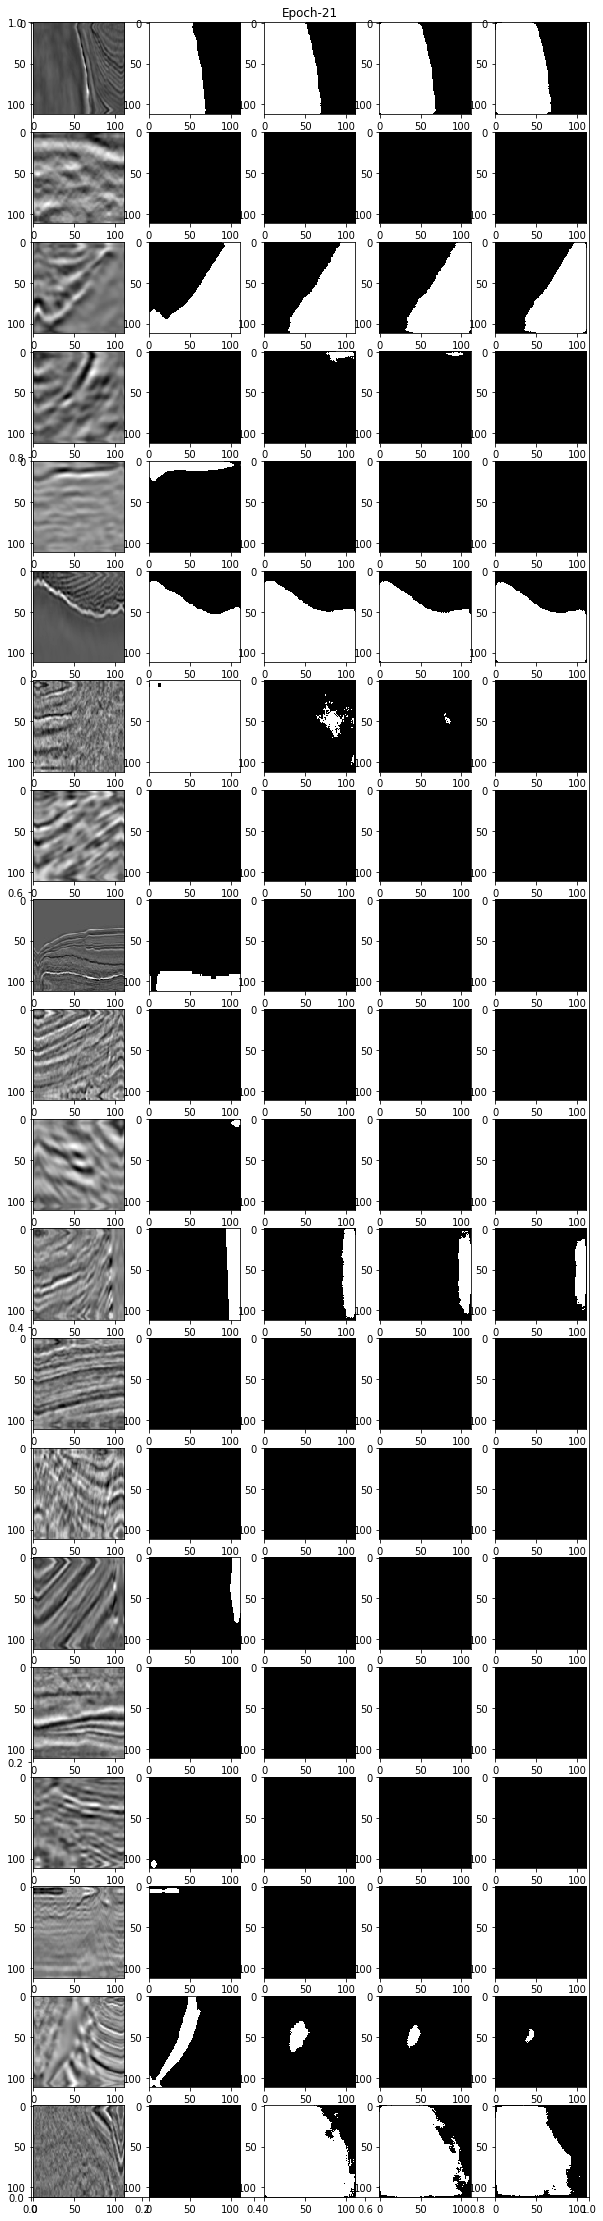

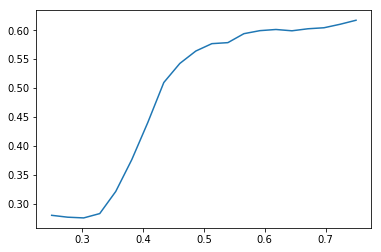

best threshold: 0.75 max threshold value: 0.61725
Epoch 23/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2637 - acc: 0.9174 - val_loss: 0.2258 - val_acc: 0.9264

Epoch 00023: val_loss did not improve from 0.22539
Epoch 24/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2581 - acc: 0.9198 - val_loss: 0.2296 - val_acc: 0.9267

Epoch 00024: val_loss did not improve from 0.22539

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 25/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2637 - acc: 0.9173 - val_loss: 0.2326 - val_acc: 0.9262

Epoch 00025: val_loss did not improve from 0.22539
400/400 [==============================] - 3s 8ms/step
(array([2992660,  690343,  200010,   98111,   63329,   49889,   43013,
         43533,   57248,  779464], dtype=int64), array([0.0017786 , 0.10160074, 0.20142287, 0.301245  , 0.40106717,
       0.5008893 , 0.60071146, 0.70053357, 0.80035573, 0.90017784,
      

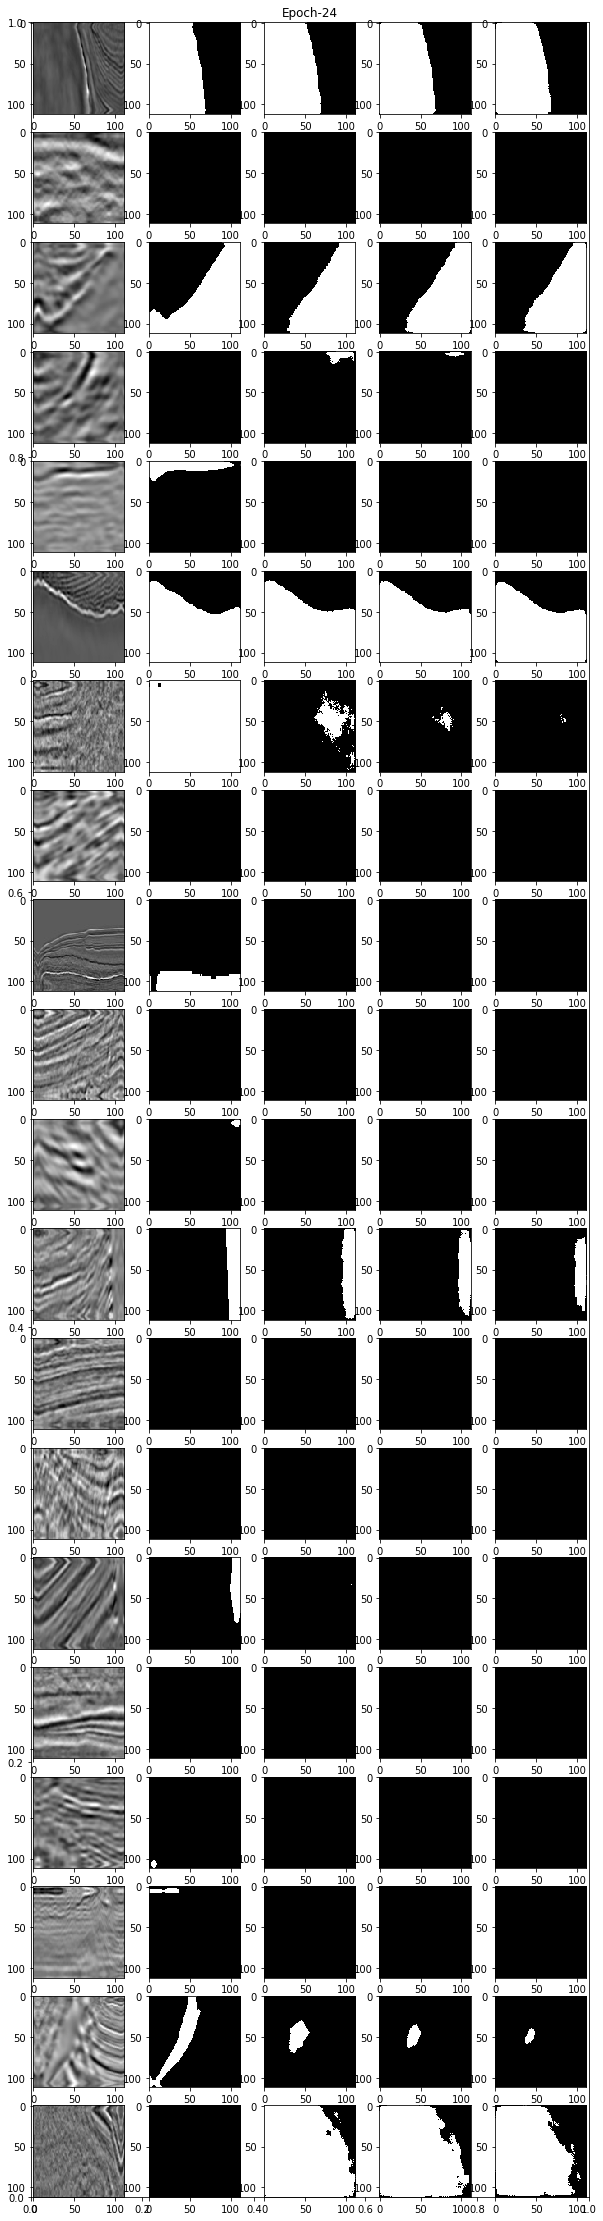

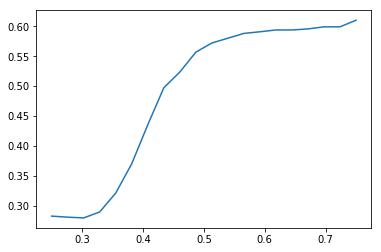

best threshold: 0.75 max threshold value: 0.6100000000000001
Epoch 26/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2692 - acc: 0.9163 - val_loss: 0.2252 - val_acc: 0.9263

Epoch 00026: val_loss improved from 0.22539 to 0.22517, saving model to model5\model.h5
Epoch 27/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2630 - acc: 0.9181 - val_loss: 0.2271 - val_acc: 0.9265

Epoch 00027: val_loss did not improve from 0.22517
Epoch 28/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2538 - acc: 0.9210 - val_loss: 0.2272 - val_acc: 0.9265

Epoch 00028: val_loss did not improve from 0.22517
400/400 [==============================] - 3s 9ms/step
(array([3180866,  608231,  170222,   82131,   54345,   41462,   39197,
         40826,   54793,  745527], dtype=int64), array([0.0014128 , 0.10127152, 0.20113024, 0.30098897, 0.40084767,
       0.5007064 , 0.60056514, 0.70042384, 0.80028254, 0.9001413 ,
       1.        ], dty

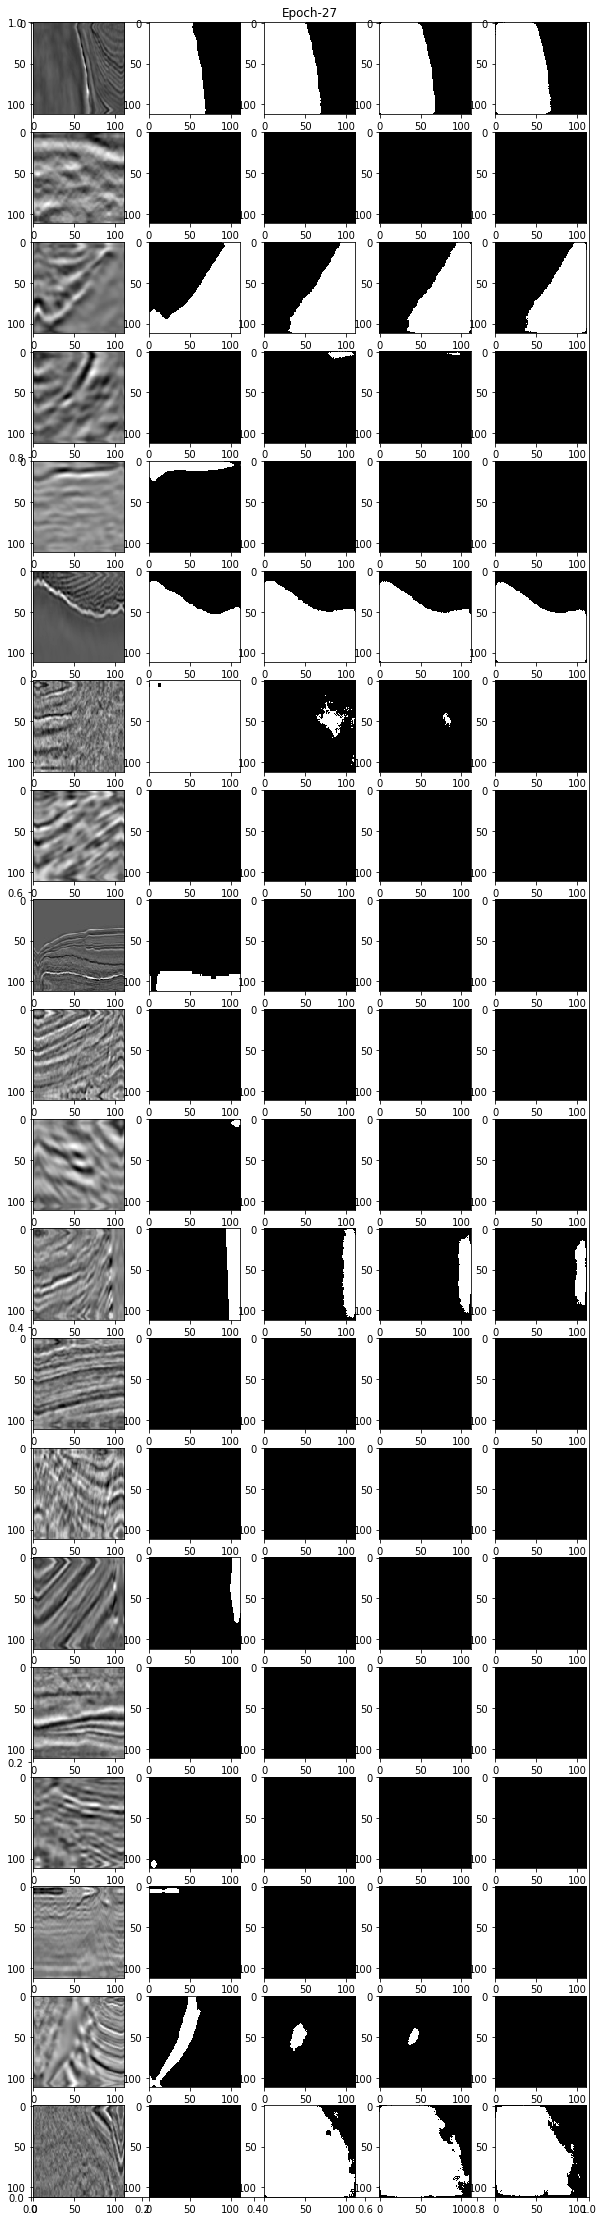

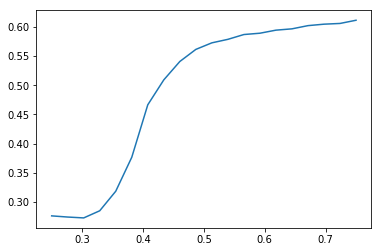

best threshold: 0.75 max threshold value: 0.6114999999999999
Epoch 29/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2581 - acc: 0.9187 - val_loss: 0.2266 - val_acc: 0.9267

Epoch 00029: val_loss did not improve from 0.22517

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 30/100
3600/3600 [==============================] - 58s 16ms/step - loss: 0.2734 - acc: 0.9141 - val_loss: 0.2283 - val_acc: 0.9267

Epoch 00030: val_loss did not improve from 0.22517
Epoch 31/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2755 - acc: 0.9143 - val_loss: 0.2303 - val_acc: 0.9267

Epoch 00031: val_loss did not improve from 0.22517
400/400 [==============================] - 3s 9ms/step
(array([3134092,  617105,  177093,   86105,   56176,   43099,   39516,
         41109,   54576,  768729], dtype=int64), array([0.00163536, 0.10147183, 0.2013083 , 0.30114475, 0.40098122,
       0.50081766, 0.6006541 , 0.7004906 , 0.80032706, 0.90016

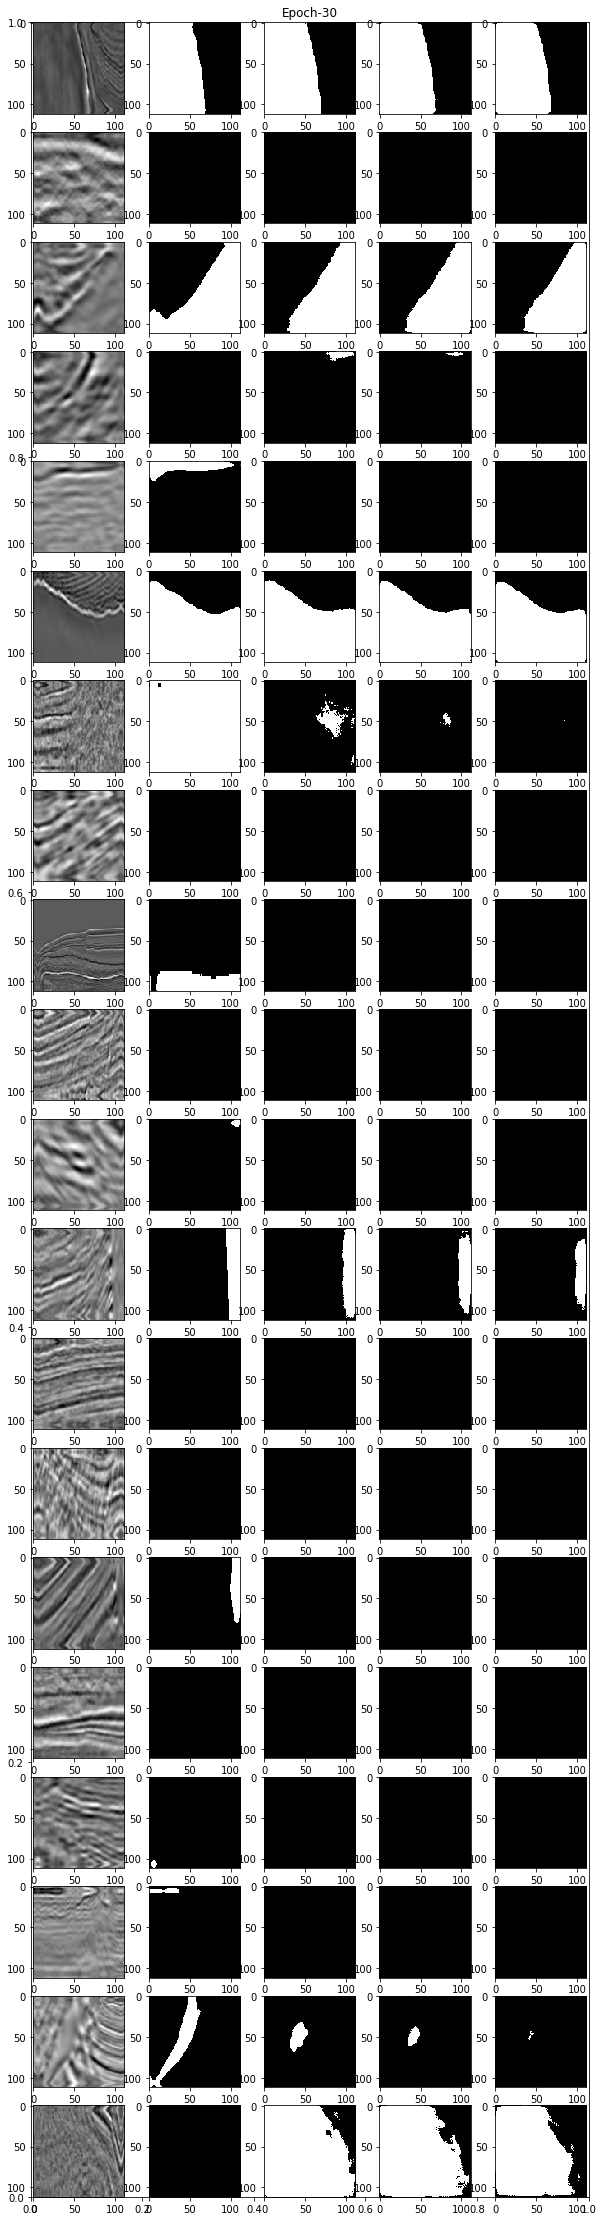

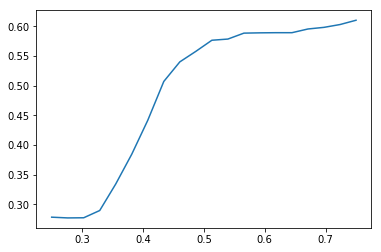

best threshold: 0.75 max threshold value: 0.6105
Epoch 32/100
3600/3600 [==============================] - 57s 16ms/step - loss: 0.2626 - acc: 0.9180 - val_loss: 0.2267 - val_acc: 0.9265

Epoch 00032: val_loss did not improve from 0.22517

Epoch 00032: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 00032: early stopping


In [39]:
model_name = 'model5'
if not os.path.exists(model_name):
    os.mkdir(model_name)
print(model.summary())
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy',metrics = ['accuracy'])
#model.load_weights(r'D:\Weights\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',by_name = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience = 3, verbose = 1, min_lr = 1e-7)
model_checkpoint = ModelCheckpoint(os.path.join(model_name,'model.h5'), monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
logger = CSVLogger(os.path.join(model_name,'logger.log'))
early_stop = EarlyStopping(monitor = 'val_loss' , patience = 6,verbose = 1)
results = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs = 100,
            callbacks = [model_checkpoint,reduce_lr,logger,OutputObserver(x_val,y_val),early_stop] ,shuffle = True, verbose = 1, batch_size = 8)


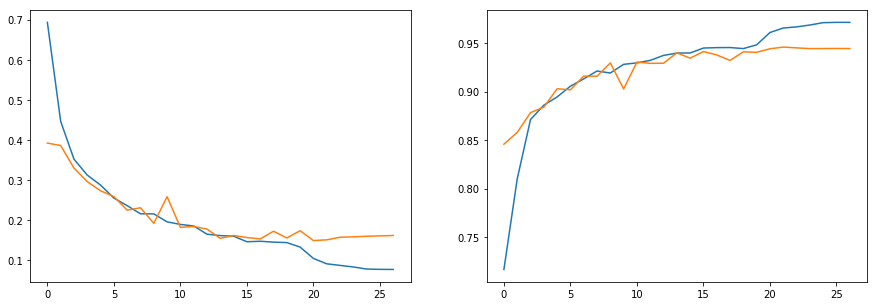

In [35]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(results.epoch, results.history["loss"], label="Train loss")
ax_loss.plot(results.epoch, results.history["val_loss"], label="Validation loss")
ax_acc.plot(results.epoch, results.history["acc"], label="Train accuracy")
ax_acc.plot(results.epoch, results.history["val_acc"], label="Validation accuracy")

400/400 [==============================] - 4s 10ms/step


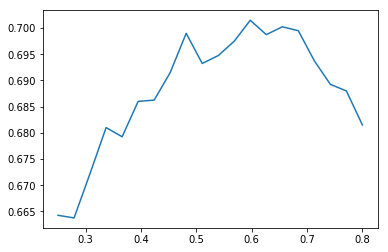

best threshold: 0.5973684210526315 max threshold value: 0.7015


In [37]:
model = load_model(r'D:\Notebooks\Kaggle-TGS-Salt\model5\model.h5')
y_pred = model.predict(x_val,batch_size = 1,verbose = 1)
thres = np.linspace(0.25, 0.80, 20)
thres_ioc = [iou_metric_batch(y_val, np.int32(y_pred > t)) for t in thres]
plt.plot(thres, thres_ioc)
plt.show()
best_thres = thres[np.argmax(thres_ioc)]
print('best threshold:',best_thres,'max threshold value:' ,max(thres_ioc))